# Titanic - Machine Learning from Disaster

* Author: Lamin Bojang
* Date created: 2023-06-02
* Date modified: 2023-06-10
* Description: Titanic data analysis and visualization


TODO:
- [x] Import libraries
- [x] Load data
- [x] Data cleaning
- [x] Data exploration
- [x] Data visualization
- [x]check for missing values
- [x] Data imputation
- [x] Drop unnecessary columns
- [x] Convert categorical to numerical
- [ ] Feature scaling


### Data Dictionary

| Variable | Definition                             | Key                                       |
|----------|----------------------------------------|-------------------------------------------|
| survival | Survival                               | 0 = No, 1 = Yes                           |
| pclass   | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex      | Sex                                    |                                           |
| Age      | Age in years                           |                                           |
| sibsp    | # of siblings / spouses aboard Titanic |                                           |
| parch    | # of parents / children aboard Titanic |                                           |
| ticket   | Ticket number                          |                                           |
| fare     | Passenger fare                         |                                           |
| cabin    | Cabin number                           |                                           |
| embarked | Port of Embarkation                    | C = Cherbourg, Q = Queenstown, S = Southampton |


In [1]:
# !pip install missingno

import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
# Set the background color globally
plt.rcParams['axes.facecolor'] = 'darkgray'

import seaborn as sns
sns.set_style('darkgrid')

palette = sns.color_palette("coolwarm", 7)

#markdown display in jupyter notebook output
from IPython.core.display import Markdown as md

#Enable jupyter notebook cells to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#hide warnings
import warnings
warnings.filterwarnings('ignore')

### Helper Functions

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def generate_dataframe_summary(dataframe):
    """
    Generates a summary of the dataframe.
    """
    summary = pd.DataFrame({
        'features': dataframe.columns,
        'dataType': dataframe.dtypes,
        'unqValCount': dataframe.nunique(),
        'nullsCount': dataframe.isna().sum()
    })

    summary['nullsPct'] = (summary['nullsCount'] / dataframe.shape[0]).round(4) * 100
    summary['Unique values(All if < 10)'] = summary['features'].apply(lambda col: dataframe[col].unique()[:10])

    return summary.sort_values(by=["dataType", 'unqValCount'], ascending=False).reset_index(drop=True)


def encode_features(dataframe, features, method='onehot'):
    """
    Encodes specified features using either one-hot or label encoding.

    Parameters:
    features: A list of feature names to encode.
    method: The encoding method to use. Either 'onehot' or 'label'. Default is 'onehot'.
    """
    encoded_df = dataframe.copy()

    if method == 'onehot':
        encoder = OneHotEncoder()
        for feature in features:
            encoded_feature = pd.DataFrame(encoder.fit_transform(encoded_df[[feature]]).toarray())
            encoded_feature.columns = encoder.get_feature_names_out([feature])
            encoded_df = pd.concat([encoded_df, encoded_feature], axis=1).drop([feature], axis=1)
    elif method == 'label':
        encoder = LabelEncoder()
        for feature in features:
            encoded_df[feature] = encoder.fit_transform(encoded_df[feature])
    else:
        raise ValueError("Method must be either 'onehot' or 'label'.")

    return encoded_df

def correlation_matrix(df):
    corr = df.corr()
    figure = plt.figure(figsize=(8, 5))
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap', fontsize=8)
    plt.show()
    


### Import CSV to a pandas DataFrame


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


### Explore the  data

In [4]:
md("### First Three Rows of the Training dataframe")
df_train.head(3)
md("### Random Sampling from the Training Data Frame")
df_train.sample(3)


### First Three Rows of the Training dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Random Sampling from the Training Data Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.000,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.775,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.050,NaN,S


In [5]:
md("### First Three Rows of the Test dataframe")
df_test.head(3)
md("### Random Sampling from the Test Data Frame")
df_test.sample(3)


### First Three Rows of the Test dataframe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Random Sampling from the Test Data Frame

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
generate_dataframe_summary(df_train)


,features,dataType,unqValCount,nullsCount,nullsPct,Unique values(All if < 10)
0,Name,object,891,0,0.00,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
1,Ticket,object,681,0,0.00,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
2,Cabin,object,147,687,77.10,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C..."
3,Embarked,object,3,2,0.22,"[S, C, Q, nan]"
4,Sex,object,2,0,0.00,"[male, female]"
5,Fare,float64,248,0,0.00,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
6,Age,float64,88,177,19.87,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
7,PassengerId,int64,891,0,0.00,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
8,SibSp,int64,7,0,0.00,"[1, 0, 3, 4, 2, 5, 8]"
9,Parch,int64,7,0,0.00,"[0, 1, 2, 5, 3, 4, 6]"


In [9]:
generate_dataframe_summary(df_test)


,features,dataType,unqValCount,nullsCount,nullsPct,Unique values(All if < 10)
0,Name,object,418,0,0.00,"[Kelly, Mr. James, Wilkes, Mrs. James (Ellen N..."
1,Ticket,object,363,0,0.00,"[330911, 363272, 240276, 315154, 3101298, 7538..."
2,Cabin,object,76,327,78.23,"[nan, B45, E31, B57 B59 B63 B66, B36, A21, C78..."
3,Embarked,object,3,0,0.00,"[Q, S, C]"
4,Sex,object,2,0,0.00,"[male, female]"
5,Fare,float64,169,1,0.24,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ..."
6,Age,float64,79,86,20.57,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26...."
7,PassengerId,int64,418,0,0.00,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ..."
8,Parch,int64,8,0,0.00,"[0, 1, 3, 2, 4, 6, 5, 9]"
9,SibSp,int64,7,0,0.00,"[0, 1, 2, 3, 4, 5, 8]"


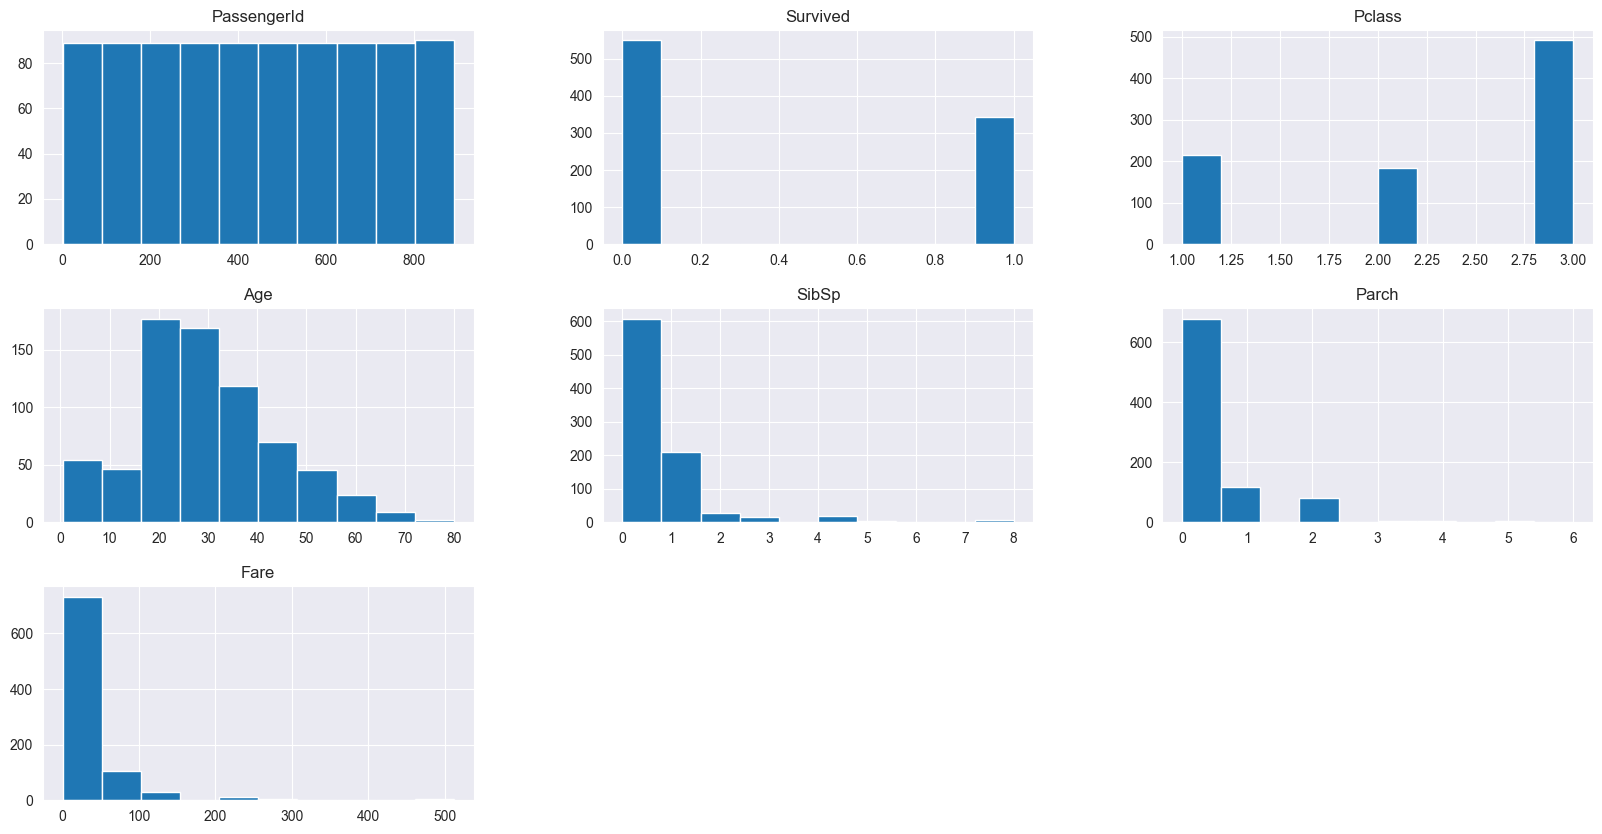

In [10]:
# hist plot of numeric columns in the Training Data Frame
df_train.hist(figsize=(20, 10));

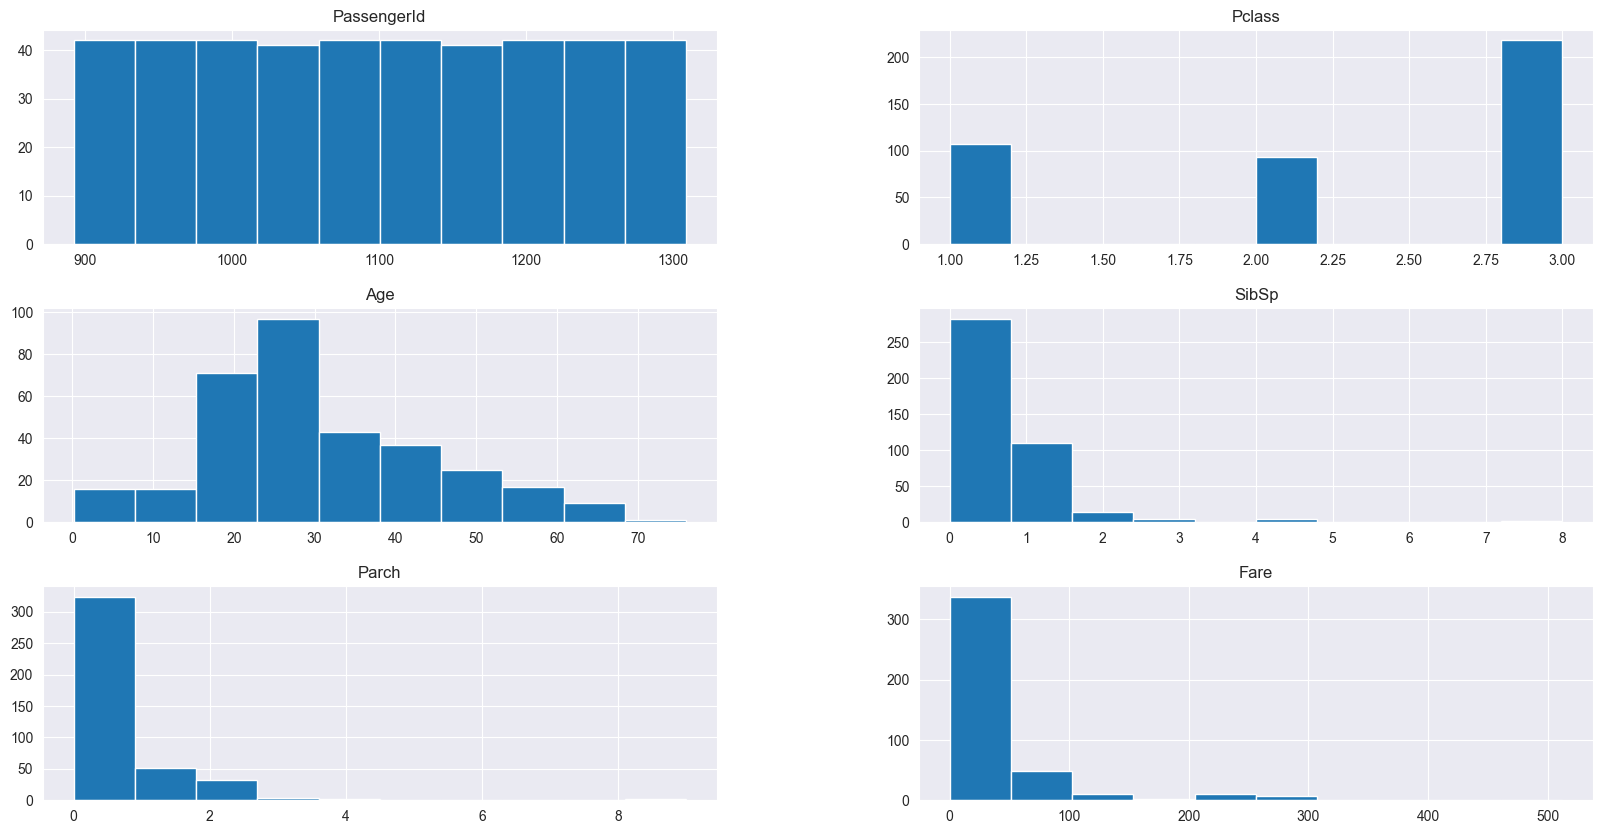

In [11]:
# hist plot of numeric columns in the Training Data Frame
df_test.hist(figsize=(20, 10));

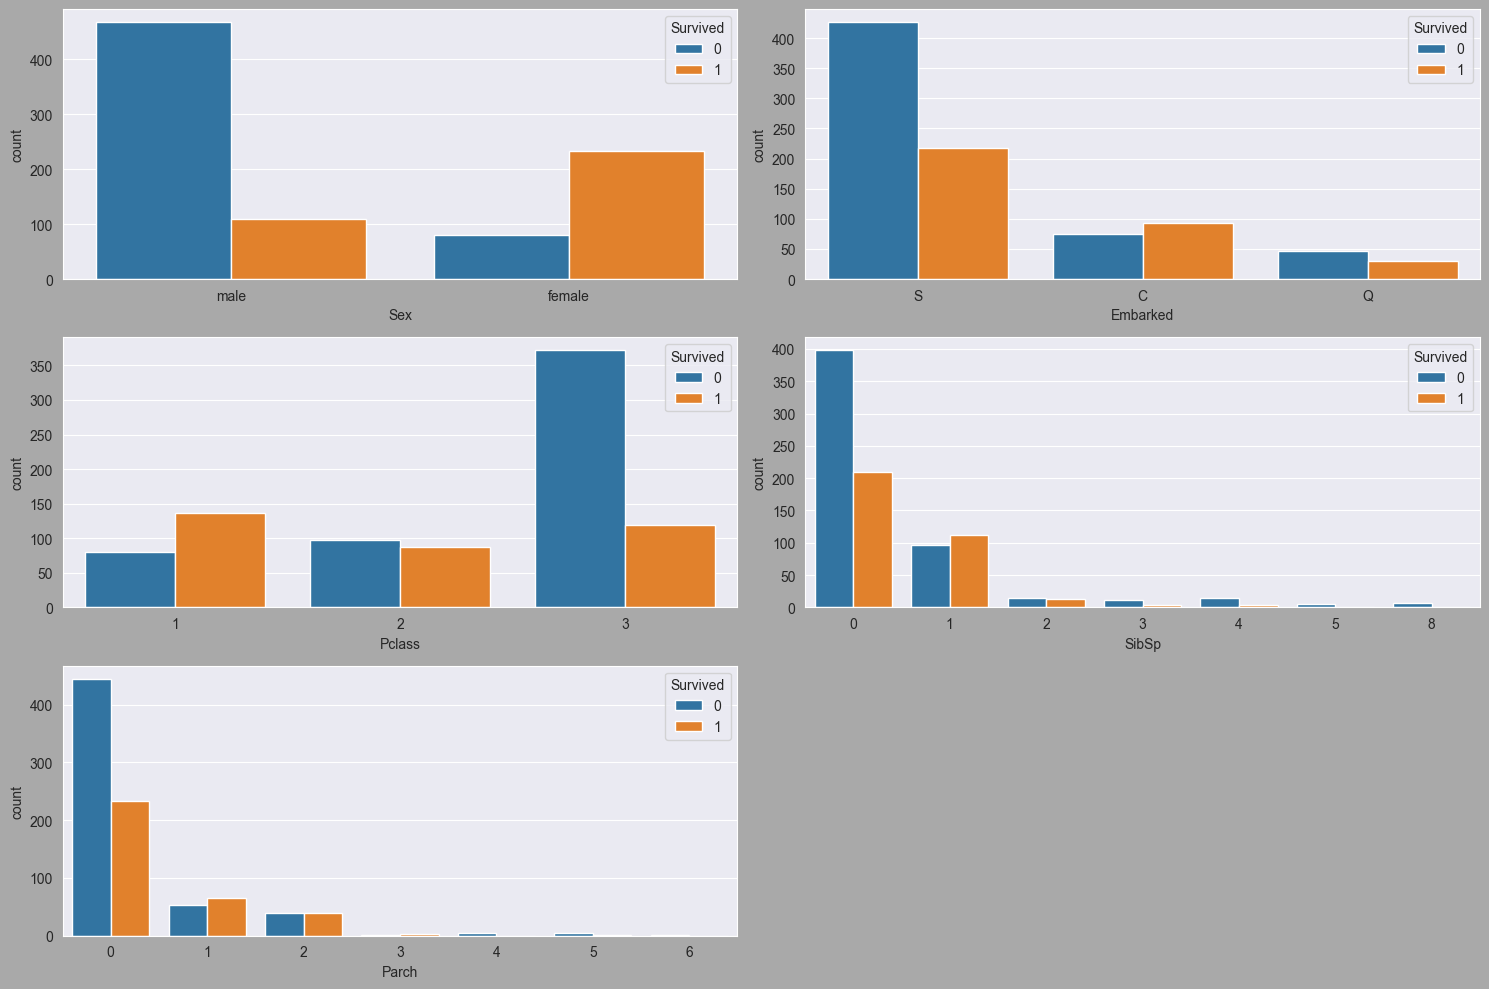

In [12]:
#plot of categorical columns
fig, axes = plt.subplots(3,2 , figsize=(15, 10))
fig.set_facecolor('darkgray')

sns.countplot(data=df_train, x= 'Sex',  hue='Survived', ax=axes[0][0])
sns.countplot(data=df_train, x= 'Embarked',  hue='Survived', ax=axes[0][1])
sns.countplot(data=df_train, x= 'Pclass',  hue='Survived', ax=axes[1][0])
sns.countplot(data=df_train, x= 'SibSp',  hue='Survived', ax=axes[1][1])
sns.countplot(data=df_train, x= 'Parch',  hue='Survived', ax=axes[2][0])
# Add a placeholder plot in the last subplot
axes[2][1].axis('off')

plt.tight_layout();
    


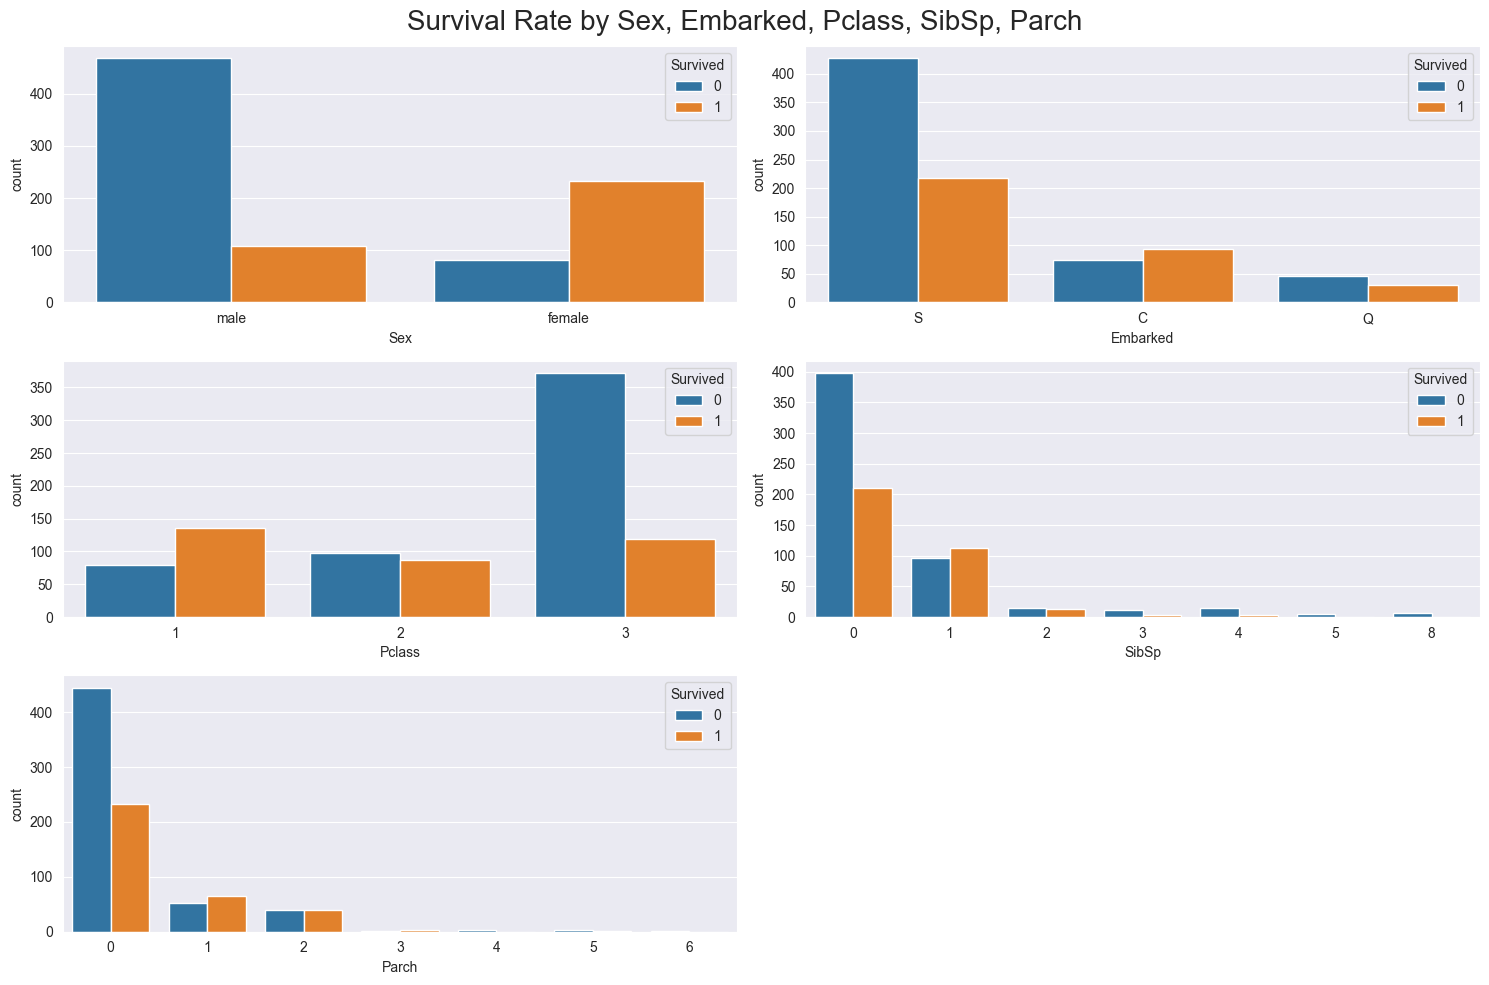

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Survival Rate by Sex, Embarked, Pclass, SibSp, Parch', fontsize=20)
sns.countplot(data=df_train, x='Sex', hue='Survived', ax=axes[0][0])
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=axes[0][1])
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=axes[1][0])
sns.countplot(data=df_train, x='SibSp', hue='Survived', ax=axes[1][1])
sns.countplot(data=df_train, x='Parch', hue='Survived', ax=axes[2][0])

# Add a placeholder plot in the last subplot
axes[2][1].axis('off')

plt.tight_layout()
plt.show();

# Data  Cleaning

#### Check for missing values

In [14]:
md("### Train Data Summary")
generate_dataframe_summary(df_train)

md("### Test Data Summary")
generate_dataframe_summary(df_test)


### Train Data Summary

,features,dataType,unqValCount,nullsCount,nullsPct,Unique values(All if < 10)
0,Name,object,891,0,0.00,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
1,Ticket,object,681,0,0.00,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
2,Cabin,object,147,687,77.10,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C..."
3,Embarked,object,3,2,0.22,"[S, C, Q, nan]"
4,Sex,object,2,0,0.00,"[male, female]"
5,Fare,float64,248,0,0.00,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
6,Age,float64,88,177,19.87,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
7,PassengerId,int64,891,0,0.00,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
8,SibSp,int64,7,0,0.00,"[1, 0, 3, 4, 2, 5, 8]"
9,Parch,int64,7,0,0.00,"[0, 1, 2, 5, 3, 4, 6]"


### Test Data Summary

,features,dataType,unqValCount,nullsCount,nullsPct,Unique values(All if < 10)
0,Name,object,418,0,0.00,"[Kelly, Mr. James, Wilkes, Mrs. James (Ellen N..."
1,Ticket,object,363,0,0.00,"[330911, 363272, 240276, 315154, 3101298, 7538..."
2,Cabin,object,76,327,78.23,"[nan, B45, E31, B57 B59 B63 B66, B36, A21, C78..."
3,Embarked,object,3,0,0.00,"[Q, S, C]"
4,Sex,object,2,0,0.00,"[male, female]"
5,Fare,float64,169,1,0.24,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ..."
6,Age,float64,79,86,20.57,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26...."
7,PassengerId,int64,418,0,0.00,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ..."
8,Parch,int64,8,0,0.00,"[0, 1, 3, 2, 4, 6, 5, 9]"
9,SibSp,int64,7,0,0.00,"[0, 1, 2, 3, 4, 5, 8]"


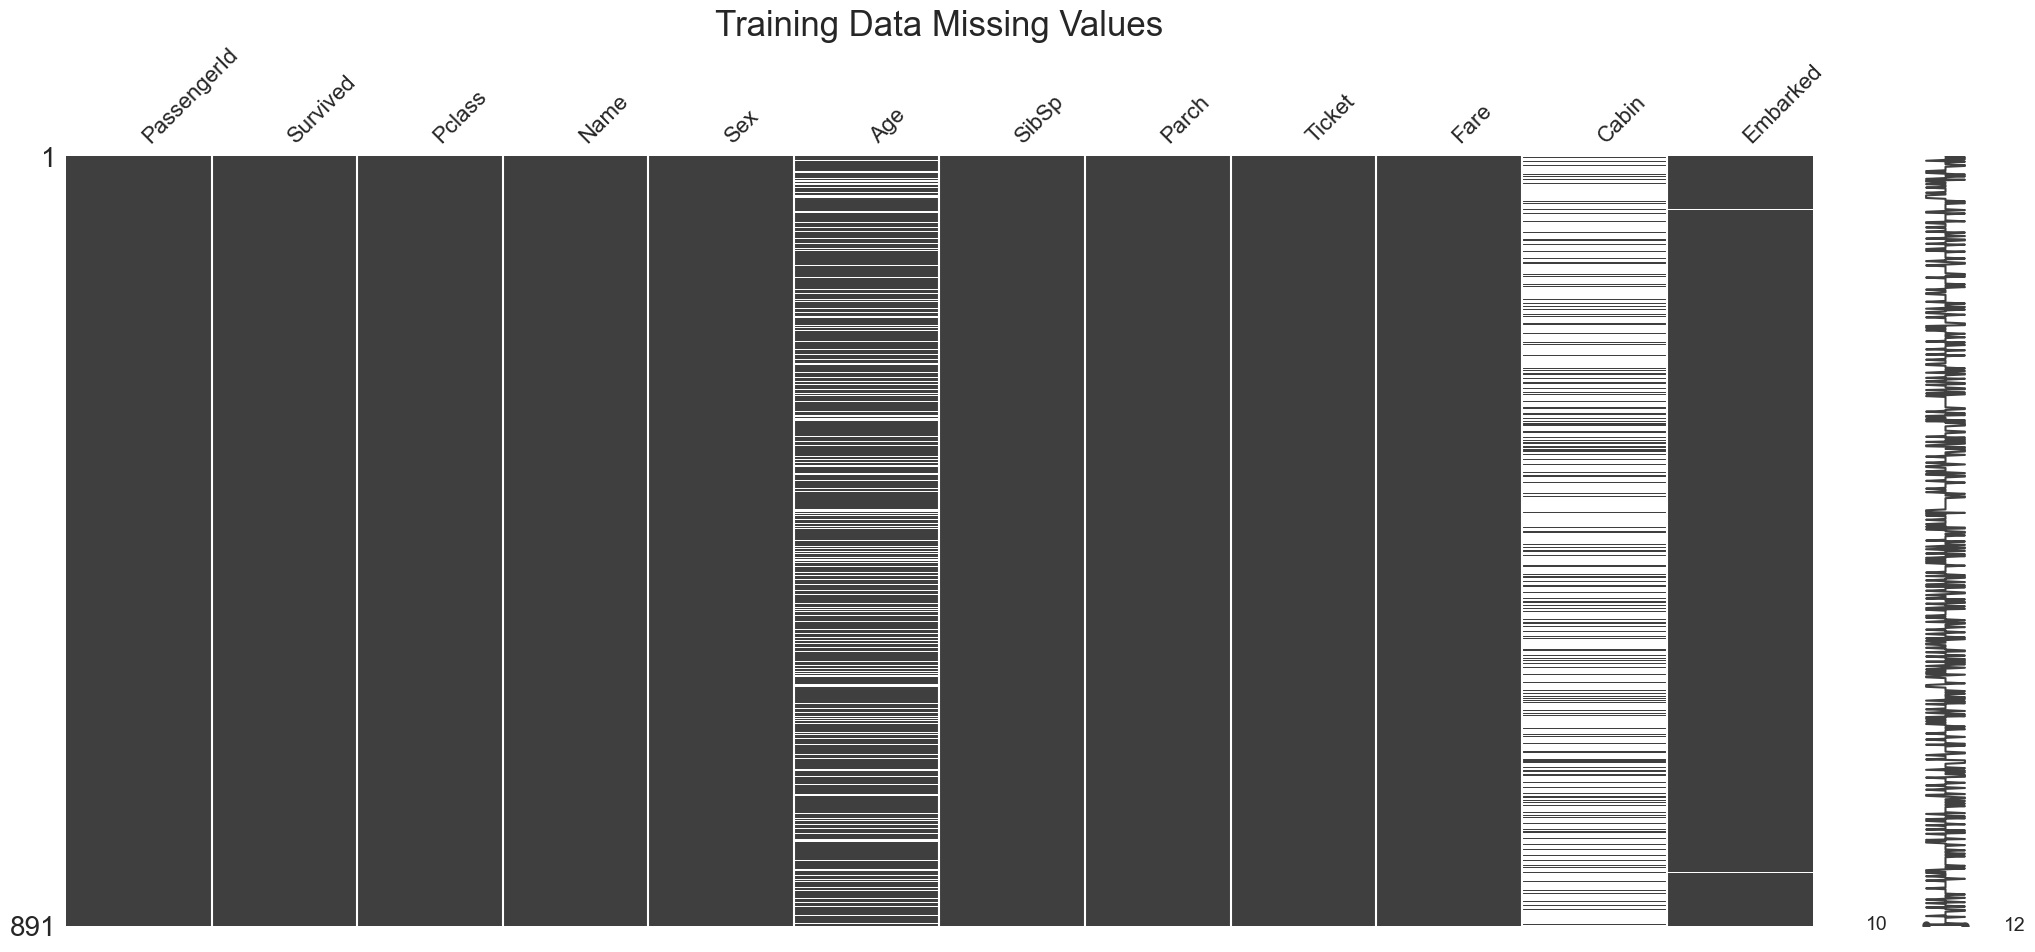

In [15]:
msno.matrix(df_train)
plt.title('Training Data Missing Values', fontsize=25)
plt.show();


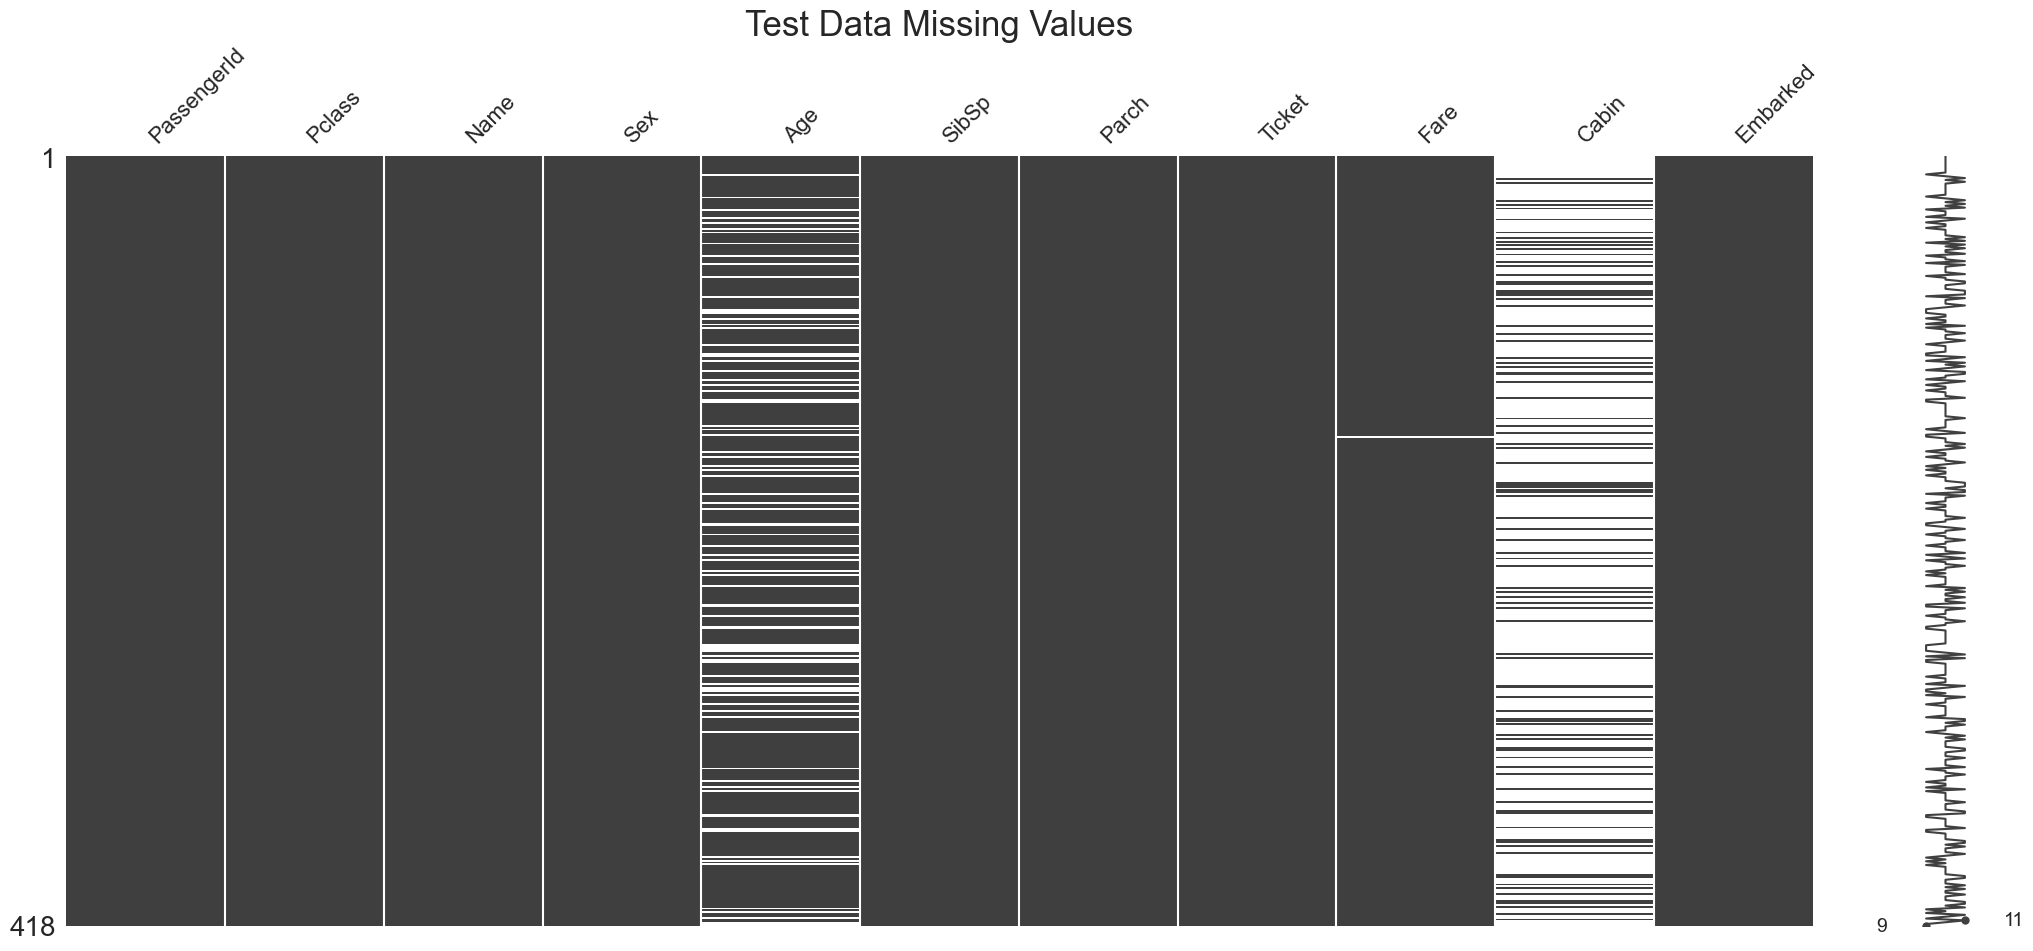

In [16]:
msno.matrix(df_test)
plt.title('Test Data Missing Values', fontsize=25)
plt.show();

> From looking at the Data  we can see we have to take the following Initial steps:
- Remove the `Cabin`	feature as it is  missing almost 78% of the rows and imputing wont be accurate it has  too much variataion in it to affect our  prediction.
- Remove `Name` and `PassengerId` columns since  they are unique to every single customer and have no predictive value  for our analysis
- `Age` has about 20% missing in both train and test dataset. The distribution is slightly skewed right so simple imputation will not give us th best outcome. So will use KNN imputer with an N of 5 and then check the standard Deviation and distribution
- checking for outlier in the  dataset  won't be necessary due  to high variability in the dataset as indicated by the 

In [17]:
md("### Age Column Statistics Before Imputation")
df_train['Age'].describe().round(2).to_frame().T

md("### Age Column nulls count before imputation")
df_train['Age'].isnull().value_counts()


### Age Column Statistics Before Imputation

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.7,14.53,0.42,20.12,28.0,38.0,80.0


### Age Column nulls count before imputation

Age
False    714
True     177
Name: count, dtype: int64

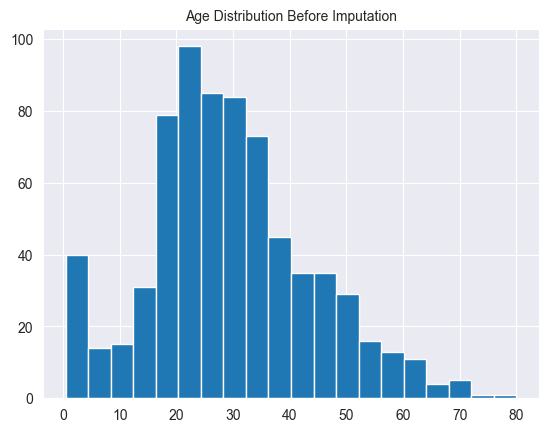

In [18]:
#plot age distribution
df_train['Age'].hist(bins=20)
plt.title('Age Distribution Before Imputation', fontsize=10);

#### Drop Features/columns not required for analysis
The following variable will be dropped from the dataframe:
- `PassengerId`: unique identifier for passengers not  predictive
- `Name`: Not needed for analysis as it has no predictive value
- `ticket`: This feature has too much variability of 681 unique values
- `cabin`: Contains to many missing  values and  variability to be valuable for  analysis

In [19]:
traindf = df_train.copy()

#drop 'Cabin', 'Ticket', 'Name', 'PassengerId' columns reset index
traindf.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
traindf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [20]:
testdf = df_test.copy()

#drop 'Cabin', 'Ticket', 'Name', 'PassengerId' columns reset index
testdf.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [21]:
#fill missing embarked in the Train data null values with mode 
traindf['Embarked'].fillna(traindf['Embarked'].mode()[0], inplace=True)
traindf.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [22]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [23]:
#fill the single missing fare value in the test data with the mean
testdf['Fare'].fillna(testdf['Fare'].mean(), inplace=True)

#### Use knn imputer to fill missing values in the Age column

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
traindf['Age'] = imputer.fit_transform(traindf[['Age']])
testdf['Age'] = imputer.fit_transform(testdf[['Age']])


In [25]:
md("#### Age Column Statistics After Imputation")
traindf['Age'].describe().round(2).to_frame().T

md("#### Age Column nulls count After imputation")
traindf['Age'].isnull().value_counts()



#### Age Column Statistics After Imputation

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.7,13.0,0.42,22.0,29.7,35.0,80.0


#### Age Column nulls count After imputation

Age
False    891
Name: count, dtype: int64

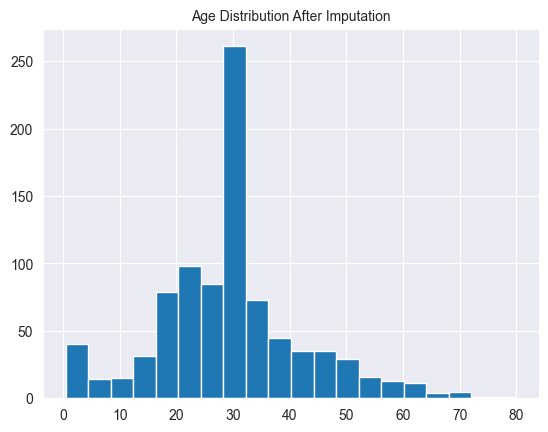

In [26]:
#plot age distribution

traindf['Age'].hist(bins=20)
plt.title('Age Distribution After Imputation', fontsize=10);

In [27]:
# md("#### Train Data Summary")
generate_dataframe_summary(traindf)

md("#### Test Data Summary")
generate_dataframe_summary(testdf)


,features,dataType,unqValCount,nullsCount,nullsPct,Unique values(All if < 10)
0,Embarked,object,3,0,0.0,"[S, C, Q]"
1,Sex,object,2,0,0.0,"[male, female]"
2,Fare,float64,248,0,0.0,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
3,Age,float64,89,0,0.0,"[22.0, 38.0, 26.0, 35.0, 29.69911764705882, 54..."
4,SibSp,int64,7,0,0.0,"[1, 0, 3, 4, 2, 5, 8]"
5,Parch,int64,7,0,0.0,"[0, 1, 2, 5, 3, 4, 6]"
6,Pclass,int64,3,0,0.0,"[3, 1, 2]"
7,Survived,int64,2,0,0.0,"[0, 1]"


#### Test Data Summary

,features,dataType,unqValCount,nullsCount,nullsPct,Unique values(All if < 10)
0,Embarked,object,3,0,0.0,"[Q, S, C]"
1,Sex,object,2,0,0.0,"[male, female]"
2,Fare,float64,170,0,0.0,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ..."
3,Age,float64,80,0,0.0,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26...."
4,Parch,int64,8,0,0.0,"[0, 1, 3, 2, 4, 6, 5, 9]"
5,SibSp,int64,7,0,0.0,"[0, 1, 2, 3, 4, 5, 8]"
6,Pclass,int64,3,0,0.0,"[3, 2, 1]"


In [28]:
traindf = encode_features(traindf, ['Embarked', 'Sex'], method='onehot') 

In [29]:
testdf = encode_features(testdf, ['Embarked', 'Sex'], method='onehot')

In [30]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
 9   Sex_female  891 non-null    float64
 10  Sex_male    891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


In [31]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Embarked_C  418 non-null    float64
 6   Embarked_Q  418 non-null    float64
 7   Embarked_S  418 non-null    float64
 8   Sex_female  418 non-null    float64
 9   Sex_male    418 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 32.8 KB


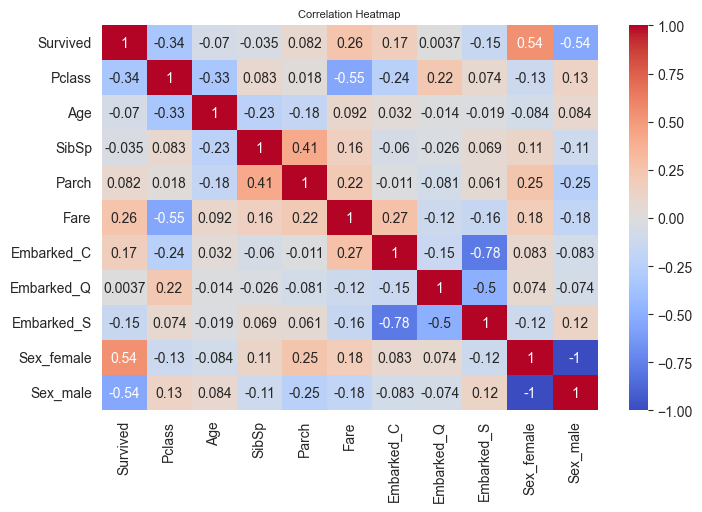

In [32]:
correlation_matrix(traindf)

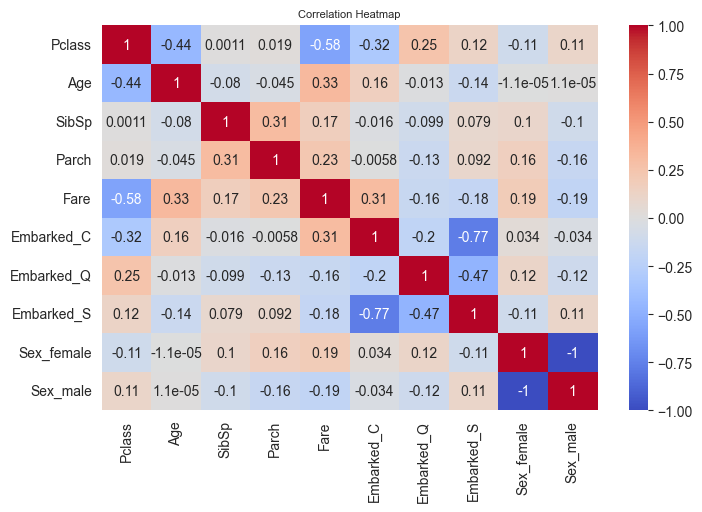

In [33]:
correlation_matrix(testdf)

### Check imbalance in the survived column

In [34]:
md("**Count of people who survived and who did not**")
traindf['Survived'].value_counts().to_frame()

md("**Percentage of people who survived and who did not**")
np.round(traindf['Survived'].value_counts(normalize=True) * 100, 2).to_frame()



**Count of people who survived and who did not**

,count
Survived,
0,549
1,342


**Percentage of people who survived and who did not**

,proportion
Survived,
0,61.62
1,38.38


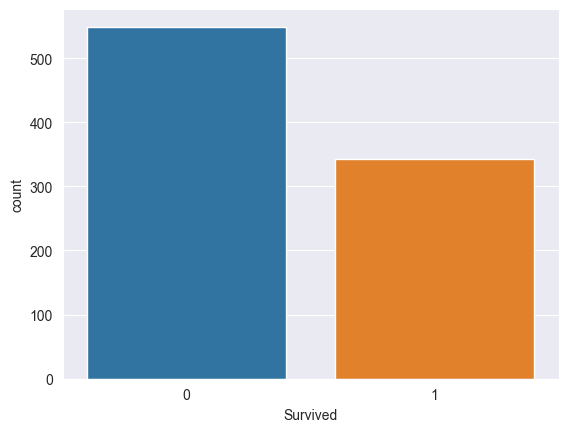

In [35]:
#plot the count of survived and not survived
sns.countplot(x='Survived', data=traindf);

> **From the data  and Graph above we  can see the data is  not imbalanced  to the point of requiring mitigation steps.**

In [63]:
md('**Average survival rate feature**')
pd.pivot_table(traindf, index='Survived', values=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'], aggfunc=np.mean).round(2)


**Average survival rate feature**

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp
Survived,,,,,,,,,,
0,30.42,0.14,0.09,0.78,22.12,0.33,2.53,0.15,0.85,0.55
1,28.55,0.27,0.09,0.64,48.40,0.46,1.95,0.68,0.32,0.47


# 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import XGBClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Split the data into features (X) and target variable (y)
X = traindf.drop("Survived", axis=1)
y = traindf["Survived"]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]

# Dictionary to store the performance metrics
performance = {}

# Iterate over the classifiers
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifier.predict(X_val)

    # Evaluate performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store the performance metrics
    performance[classifier.__class__.__name__] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Print the performance metrics
for classifier, metrics in performance.items():
    md(f"### {classifier}:")
    for metric, value in metrics.items():
        md(f"#### {metric}: {value.round(2)}")
    print()


LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### LogisticRegression:

#### Accuracy: 0.8

#### Precision: 0.77

#### Recall: 0.73

#### F1-Score: 0.75

### DecisionTreeClassifier:

#### Accuracy: 0.78

#### Precision: 0.73

#### Recall: 0.74

#### F1-Score: 0.74

### RandomForestClassifier:

#### Accuracy: 0.81

#### Precision: 0.78

#### Recall: 0.76

#### F1-Score: 0.77

### XGBClassifier:

#### Accuracy: 0.8

#### Precision: 0.75

#### Recall: 0.77

#### F1-Score: 0.76

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


RFECV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1, scoring='accuracy',
      verbose=1)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'RFECV for RandomForestClassifier')

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, '% Correct Classification')

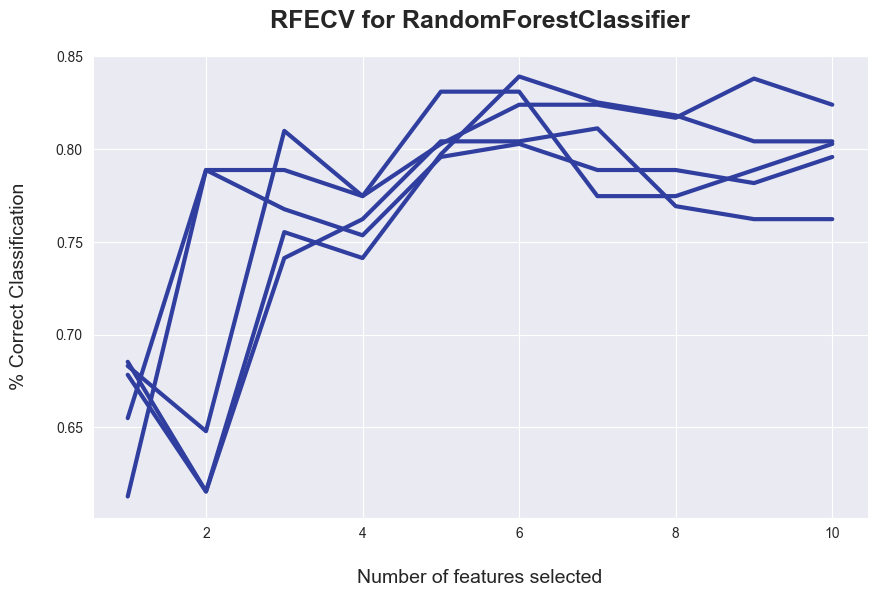

In [100]:
#Recursive Feature Elimination with Cross Validation
from sklearn.feature_selection import RFECV

# Define the classifier
classifier = RandomForestClassifier()

# Define the RFECV
rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the RFECV
rfecv.fit(X_train, y_train)

# Plot the accuracy score vs number of features

plt.figure(figsize=(10, 6))
plt.title('RFECV for RandomForestClassifier', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)    
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [93]:
# Print the optimal number of features

print(f"Optimal number of features : {rfecv.n_features_}")

# show the features rankings
feature_importances = pd.DataFrame(rfecv.ranking_, index=X_train.columns, columns=['Rank']).sort_values(by='Rank', ascending=True)
feature_importances

Optimal number of features : 7


,Rank
Pclass,1
Age,1
SibSp,1
Parch,1
Fare,1
Sex_female,1
Sex_male,1
Embarked_S,2
Embarked_C,3
Embarked_Q,4


In [99]:
# Perform RFECV for each classifier
for classifier in classifiers:
    # Perform RFECV
    selector = RFECV(estimator=classifier, cv=StratifiedKFold(5), scoring='accuracy')
    selector.fit(X, y)

    # Get the scores, feature rankings, and selected features
    Classifier = classifier.__class__.__name__
    # Print the results
    print(f"Classifier: {Classifier}")
    # print(f"Scores: {scores}")
    # print(f"Feature Rankings: {rankings}")
    # print(f"Selected Features: {features}")
    # print("\n")
    print(f"Optimal number of features : {rfecv.n_features_}")

    # show the features rankings
    feature_importances = pd.DataFrame(rfecv.ranking_, index=X_train.columns, columns=['Rank']).sort_values(by='Rank', ascending=True)
    display(feature_importances)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

Classifier: LogisticRegression
Optimal number of features : 7


,Rank
Pclass,1
Age,1
SibSp,1
Parch,1
Fare,1
Sex_female,1
Sex_male,1
Embarked_S,2
Embarked_C,3
Embarked_Q,4


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

Classifier: DecisionTreeClassifier
Optimal number of features : 7


,Rank
Pclass,1
Age,1
SibSp,1
Parch,1
Fare,1
Sex_female,1
Sex_male,1
Embarked_S,2
Embarked_C,3
Embarked_Q,4


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

Classifier: RandomForestClassifier
Optimal number of features : 7


,Rank
Pclass,1
Age,1
SibSp,1
Parch,1
Fare,1
Sex_female,1
Sex_male,1
Embarked_S,2
Embarked_C,3
Embarked_Q,4


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...),
      scoring='accuracy')

Classifier: XGBClassifier
Optimal number of features : 7


,Rank
Pclass,1
Age,1
SibSp,1
Parch,1
Fare,1
Sex_female,1
Sex_male,1
Embarked_S,2
Embarked_C,3
Embarked_Q,4
